#**AIRLINE PASSENGER RECOMMENDATION CLASSIFICATION**

# **Problem Statement**


The goal of this machine learning project is to classify airlines into categories based on certain features or attributes.  In this project, We will be exploring if passengers would recommend the airline to their friends and families, based on their travel experience,reviews and ratings.



In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Loading data
df = pd.read_excel('/content/data_airline_reviews.xlsx')


In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

70711

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


In [ ]:
df.isnull().sum().sum()

1326305

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with user feedback ratings and reviews based on their travel experience.

It has 131895 rows 17 different columns.

1. **Airline** - The name of the airline.
2. **Overall Rating** - The overall score or rating given to the airline.
3. **Authore** - The name of the person who wrote the review.
4. **Review Date** - The date when the review was posted.
5. **Review Text** - The detailed feedback or comments written by the customer.
6. **Aircraft Type** - The type of airplane used for the journey.
7. **Traveler Type** - The category of traveler (e.g., solo, couple, family, business).
8. **Cabin Class** - The class of travel chosen by the flyer (Economy, Business, Premium Economy, First Class).
9. **Flight Route** - The flight path or route taken by the traveler.
10. **Travel Date** - The date of the travel.
11. **Seat Comfort Rating** - The rating for the comfort of the seat.
12. **Cabin Service Rating** - The rating for the quality of service provided by the cabin crew.
13. **Food & Drinks Rating** - The rating for the food and drinks offered during the flight.
14. **Entertainment Rating** - The rating for in-flight entertainment services.
15. **Ground Service Rating** - The rating for the services provided by staff on the ground (e.g., check-in, boarding).
16. **Value for Money** - The rating for how worthwhile the cost of the flight was.
17. **Recommended** - Whether the traveler would recommend the airline (Yes/No).

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


In [ ]:
#Check for unique values exclude the NaN values
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  airline is 81
No. of unique values in  overall is 10
No. of unique values in  author is 44069
No. of unique values in  review_date is 3015
No. of unique values in  customer_review is 61172
No. of unique values in  aircraft is 2088
No. of unique values in  traveller_type is 4
No. of unique values in  cabin is 4
No. of unique values in  route is 24549
No. of unique values in  date_flown is 63
No. of unique values in  seat_comfort is 5
No. of unique values in  cabin_service is 5
No. of unique values in  food_bev is 5
No. of unique values in  entertainment is 5
No. of unique values in  ground_service is 5
No. of unique values in  value_for_money is 5
No. of unique values in  recommended is 2


In [ ]:
# Make a copy of data for safety purpose
df1=df.copy()

In [ ]:
#Droping all duplicated rows as there are many blank and duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
#Drop the index column , for resetting the index
df.reset_index(drop=True, inplace=True)

In [ ]:
#Check for shape of dataset
df.shape

(61184, 17)

In [ ]:
#checking for null values and sorting them in ascending order
df.isnull().sum().sort_values(ascending=False)

,0
aircraft,42696
ground_service,24015
date_flown,23750
route,23671
traveller_type,23644
entertainment,20954
food_bev,12843
seat_comfort,4973
cabin_service,4944
cabin,2479


In [ ]:
#Droping unwanted columns that is not used for our analysis
df.drop(columns=(['author','customer_review','route']),axis=1,inplace=True)

In [ ]:
#Dropping aircraft column because it has almost all Nan Values
df.drop(columns=['aircraft'],axis=1,inplace=True)

In [ ]:
#Drop null values for these 2 columns
df.dropna(subset=(['ground_service','entertainment']),inplace=True)

In [ ]:
# Again check for null values and sort in ascending order
df.isnull().sum().sort_values(ascending=False)

,0
food_bev,782
cabin,13
date_flown,10
traveller_type,2
overall,1
seat_comfort,1
cabin_service,1
airline,0
review_date,0
entertainment,0


In [ ]:
#Fill the null vales of food_bev column with mean fo their rating
df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)

<ipython-input-22-52cb9fabf55a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)


In [ ]:
#Drop all null values in our whole dataset
df.dropna(inplace=True)

In [ ]:
#Final check for null values
df.isnull().sum()

,0
airline,0
overall,0
review_date,0
traveller_type,0
cabin,0
date_flown,0
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0


In [ ]:
# Check for shape after cleaning  dataset
df.shape

(23606, 13)

In [ ]:
df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
3,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
4,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
5,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#resetting index
df.reset_index(drop=True, inplace=True)

In [ ]:
#Check first 5 rows of dataset after cleaning
df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#Check for Datatypes of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          23606 non-null  object 
 1   overall          23606 non-null  float64
 2   review_date      23606 non-null  object 
 3   traveller_type   23606 non-null  object 
 4   cabin            23606 non-null  object 
 5   date_flown       23606 non-null  object 
 6   seat_comfort     23606 non-null  float64
 7   cabin_service    23606 non-null  float64
 8   food_bev         23606 non-null  float64
 9   entertainment    23606 non-null  float64
 10  ground_service   23606 non-null  float64
 11  value_for_money  23606 non-null  float64
 12  recommended      23606 non-null  object 
dtypes: float64(7), object(6)
memory usage: 2.3+ MB


In [ ]:
#changing data types
d_type={'overall':'int8','review_date':'datetime64[ns]','seat_comfort':'int8','cabin_service':'int8','food_bev':'int8','entertainment':'int8',
        'ground_service':'int8',
        'value_for_money':'int8'}
for i,j in d_type.items():
  df[i]=df[i].astype(j)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          23606 non-null  object        
 1   overall          23606 non-null  int8          
 2   review_date      23606 non-null  datetime64[ns]
 3   traveller_type   23606 non-null  object        
 4   cabin            23606 non-null  object        
 5   date_flown       23606 non-null  object        
 6   seat_comfort     23606 non-null  int8          
 7   cabin_service    23606 non-null  int8          
 8   food_bev         23606 non-null  int8          
 9   entertainment    23606 non-null  int8          
 10  ground_service   23606 non-null  int8          
 11  value_for_money  23606 non-null  int8          
 12  recommended      23606 non-null  object        
dtypes: datetime64[ns](1), int8(7), object(5)
memory usage: 1.2+ MB


In [ ]:
df['date_flown']=pd.to_datetime(df['date_flown'], errors='coerce')

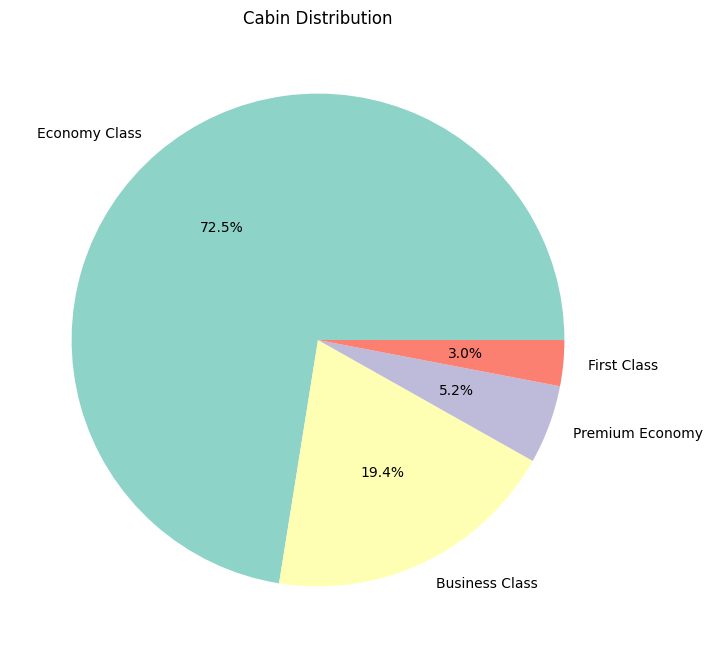

In [ ]:
# pie chart - distribution of cabin
cabin_cnt = df['cabin'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cabin_cnt, labels=cabin_cnt.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Cabin Distribution')
plt.show()

<ipython-input-34-f34b95d91748>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=airline_counts.index, y=airline_counts.values,palette='Set2')


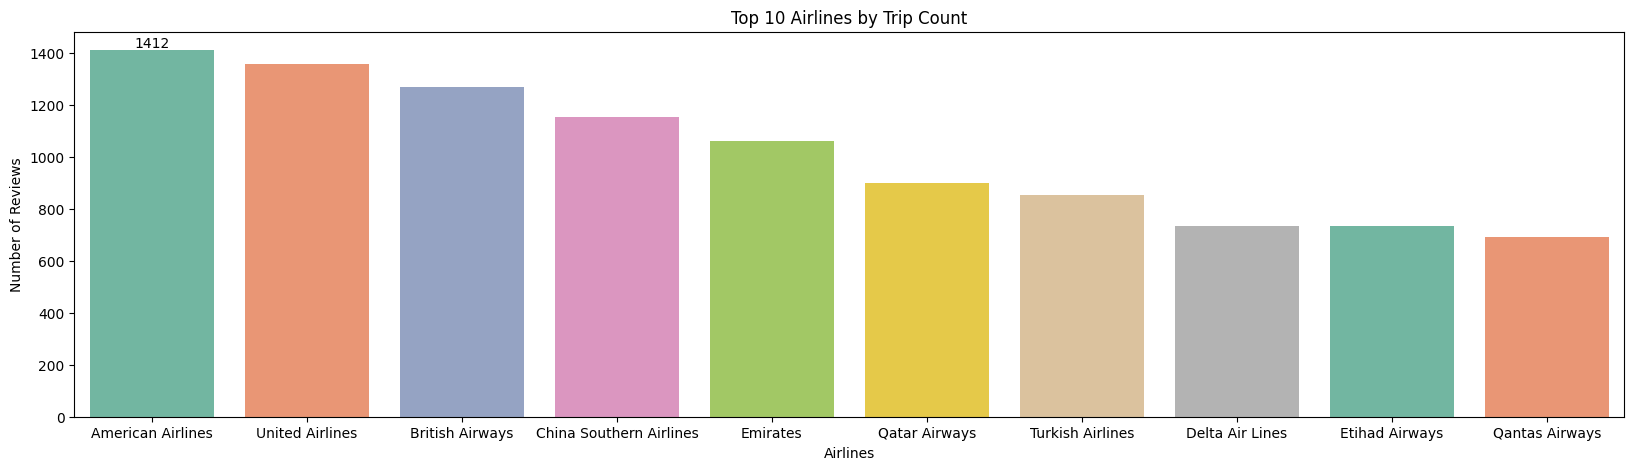

In [ ]:
#bar plot - top 10 airlines by trip count
airline_counts = df['airline'].value_counts().head(10)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=airline_counts.index, y=airline_counts.values,palette='Set2')
plt.title('Top 10 Airlines by Trip Count')
plt.xlabel('Airlines')
plt.ylabel('Number of Reviews')
ax.bar_label(ax.containers[0])
plt.show()


<ipython-input-35-991b3dbbc577>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_value, x='airline', y='value_for_money',palette = 'Set1')


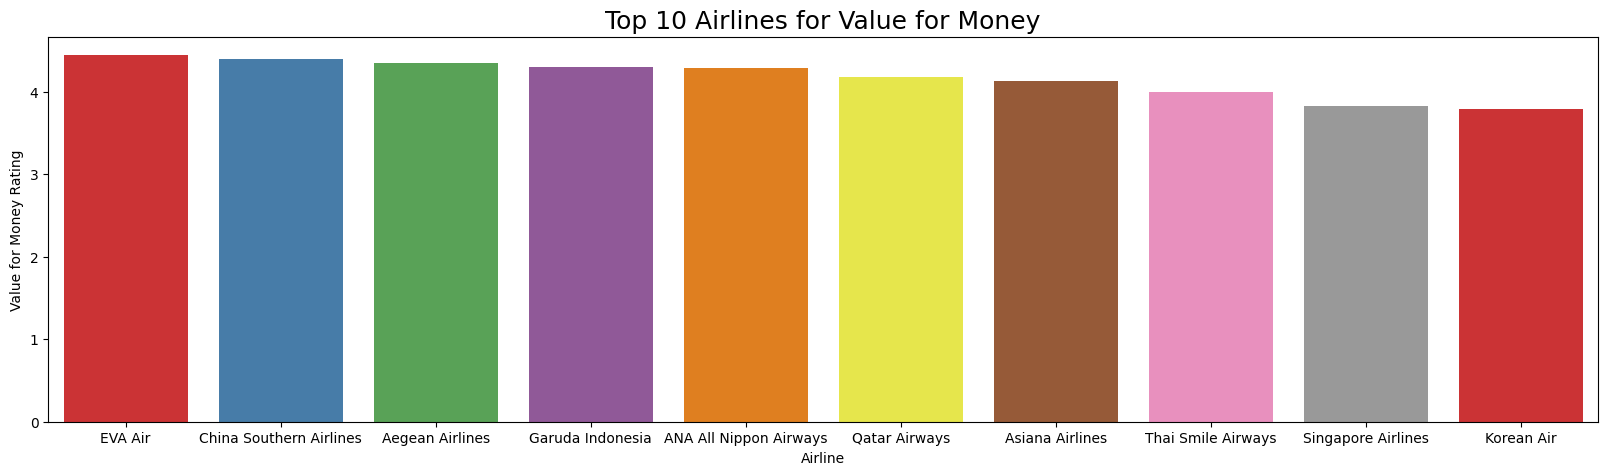

In [ ]:
#bar plot - Top 10 airlines according to value for the money paid
plt.figure(figsize=(20, 5))
top_value = df.groupby('airline')['value_for_money'].mean().nlargest(10).reset_index()
sns.barplot(data=top_value, x='airline', y='value_for_money',palette = 'Set1')
plt.xlabel('Airline')
plt.ylabel('Value for Money Rating')
plt.title('Top 10 Airlines for Value for Money', fontsize=18)
plt.show()


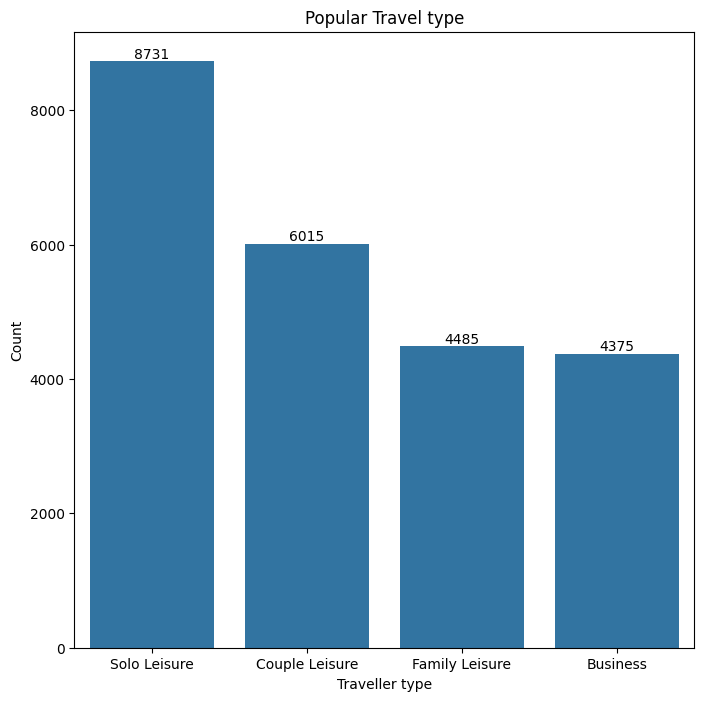

In [ ]:
#bar plot - popular travel type
popular_trav = df["traveller_type"].value_counts()
plt.figure(figsize=(8, 8))
ax1 = sns.barplot(x=popular_trav.index,y = popular_trav.values)
plt.ylabel('Count')
plt.xlabel('Traveller type')
plt.title('Popular Travel type')
ax1.bar_label(ax1.containers[0])
plt.show()

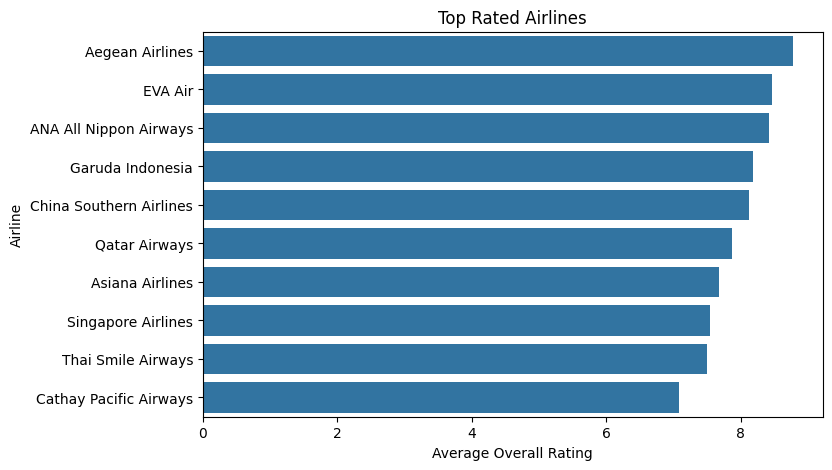

In [ ]:
#top rated airlines
plt.figure(figsize=(8, 5))
top_rated = df.groupby('airline')['overall'].mean().nlargest(10).reset_index()
sns.barplot(data=top_rated, y='airline', x='overall')
plt.xlabel('Average Overall Rating')
plt.ylabel('Airline')
plt.title('Top Rated Airlines')
plt.show()


<Axes: >

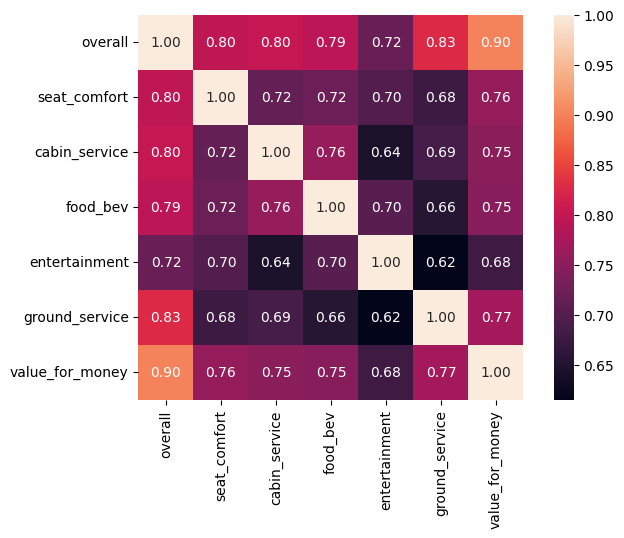

In [ ]:
#correlation heatmap
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True)

In [ ]:
# Label Encoding
label_encode = LabelEncoder()
df['recommended'] = label_encode.fit_transform(df['recommended'])

In [ ]:
#Ordinal Encoding
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'cabin', 'mapping': {'Economy Class': 1, 'Business Class': 3,'Premium Economy' : 2,'First Class' :4}}])
df['cabin']= ordinal_encoder.fit_transform(df['cabin'])

In [ ]:
#Onehot Encoding
one_hot_encoder = ce.OneHotEncoder(cols=['traveller_type'])
df = one_hot_encoder.fit_transform(df)

In [ ]:
df.drop(columns = ['review_date','date_flown','airline'],inplace = True)

In [ ]:
df[['overall','seat_comfort','food_bev','cabin_service','entertainment','ground_service','value_for_money','recommended']].corr()

,overall,seat_comfort,food_bev,cabin_service,entertainment,ground_service,value_for_money,recommended
overall,1.000000,0.795892,0.793299,0.802345,0.720355,0.826567,0.899440,0.899921
seat_comfort,0.795892,1.000000,0.720664,0.715203,0.698042,0.678297,0.758516,0.725536
food_bev,0.793299,0.720664,1.000000,0.759962,0.704976,0.655019,0.747458,0.729327
cabin_service,0.802345,0.715203,0.759962,1.000000,0.643760,0.686711,0.748290,0.742769
entertainment,0.720355,0.698042,0.704976,0.643760,1.000000,0.615235,0.679103,0.648191
ground_service,0.826567,0.678297,0.655019,0.686711,0.615235,1.000000,0.772872,0.755555
value_for_money,0.899440,0.758516,0.747458,0.748290,0.679103,0.772872,1.000000,0.839698
recommended,0.899921,0.725536,0.729327,0.742769,0.648191,0.755555,0.839698,1.000000


In [ ]:
# Drop the overall ratings because of data leakage
df.drop('overall',axis = 1 ,inplace = True)

In [ ]:
X = df.drop(columns=['recommended'])
y = df['recommended']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# shape of the splitted datasets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (18884, 11) (18884,)
Testing Set Shape: (4722, 11) (4722,)


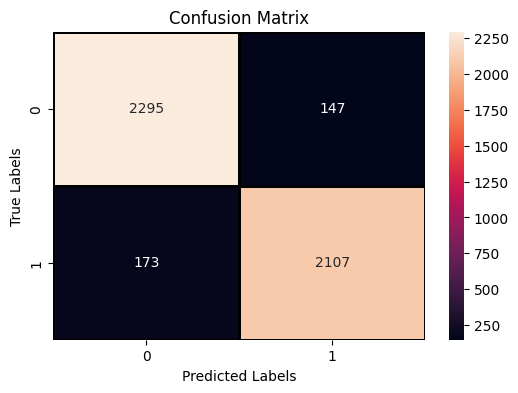

Training Accuracy: 0.9883
Testing Accuracy: 0.9322
Precision: 0.9323
Recall: 0.9322
F1-score: 0.9322


In [ ]:
#random forest classifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=1, linecolor='black')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


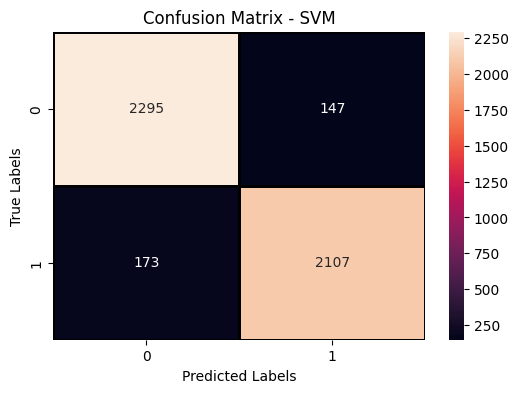

Training Accuracy: 0.9432
Testing Accuracy: 0.9394
Precision: 0.9394
Recall: 0.9394
F1-score: 0.9394


In [ ]:
# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)
svm_train_accuracy = accuracy_score(y_train, svm_y_train_pred)
svm_test_accuracy = accuracy_score(y_test, svm_y_test_pred)
svm_report = classification_report(y_test, svm_y_test_pred, output_dict=True)
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1_score = svm_report['weighted avg']['f1-score']
svm_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=1, linecolor='black')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()
print(f"Training Accuracy: {svm_train_accuracy:.4f}")
print(f"Testing Accuracy: {svm_test_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1_score:.4f}")


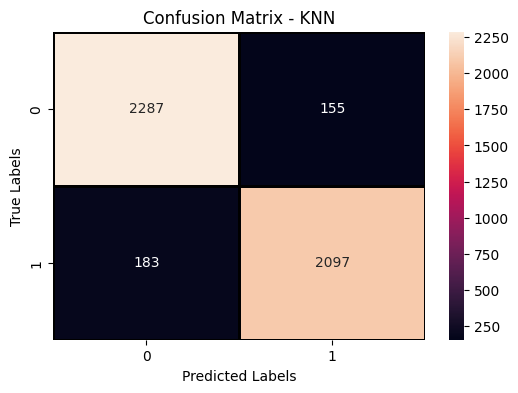

Training Accuracy: 0.9505
Testing Accuracy: 0.9284
Precision: 0.9285
Recall: 0.9284
F1-score: 0.9284


In [ ]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_train_pred = knn_model.predict(X_train)
knn_y_test_pred = knn_model.predict(X_test)
knn_train_accuracy = accuracy_score(y_train, knn_y_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_y_test_pred)
knn_report = classification_report(y_test, knn_y_test_pred, output_dict=True)
knn_precision = knn_report['weighted avg']['precision']
knn_recall = knn_report['weighted avg']['recall']
knn_f1_score = knn_report['weighted avg']['f1-score']
knn_matrix = confusion_matrix(y_test, knn_y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_matrix, annot=True, fmt='d', linewidths=1, linecolor='black')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - KNN")
plt.show()

print(f"Training Accuracy: {knn_train_accuracy:.4f}")
print(f"Testing Accuracy: {knn_test_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-score: {knn_f1_score:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters from Random Search: {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
Test Accuracy: 0.939432443879712
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2442
           1       0.94      0.93      0.94      2280

    accuracy                           0.94      4722
   macro avg       0.94      0.94      0.94      4722
weighted avg       0.94      0.94      0.94      4722



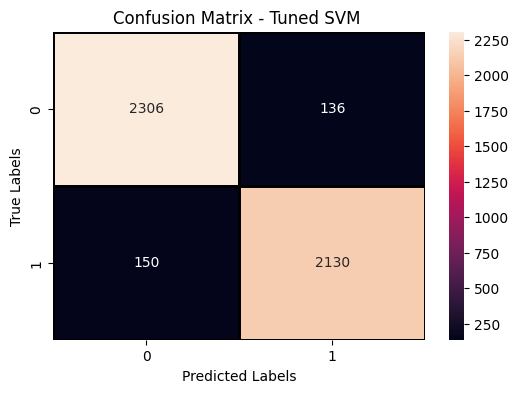

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_model = SVC(random_state=42)
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Best Hyperparameters from Random Search:", best_params)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=1, linecolor='black')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Tuned SVM ")
plt.show()
